<a href="https://colab.research.google.com/github/shumshersubashgautam/Computer-Aided-Drug-Discovery-Learning/blob/main/22_%C2%B7_Neural_Network_Ligand_based_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/volkamerlab/teachopencadd.git

Cloning into 'teachopencadd'...
remote: Enumerating objects: 17115, done.
remote: Counting objects: 100% (2094/2094), done.
remote: Compressing objects: 100% (971/971), done.
remote: Total 17115 (delta 1311), reused 1784 (delta 1121), pack-reused 15021
Receiving objects: 100% (17115/17115), 849.73 MiB | 32.24 MiB/s, done.
Resolving deltas: 100% (11503/11503), done.
Updating files: 100% (468/468), done.


The aim of the talktorial is to perform one-hot encoding of SMILES structures on a subset of the ChEMBL data set to gain a deeper understanding on the one-hot encoding concept and why it is useful as a pre-processing step in various machine learning algorithms.

# **Contents in Theory**
Molecular data and representation

ChEMBL database

SMILES structures and rules

What is categorical data?

What is the problem with categorical data?

How to convert categorical data to numerical data?

The One-Hot Encoding (OHE) concept

Why using one-hot encoding?

Example of one-hot encoding

Advantages and disadvantages of one-hot encoding

Similar: Integer or label encoding

What is padding?

Further readings

Contents in Practical
Import necessary packages

Read the input data

Process the data

Double digit replacement

Compute longest (& shortest) SMILES

Python one-hot encoding implementation

One-hot encode (padding=True)

Visualization

Shortest SMILES

Longest SMILES

Supplementary material

Scikit learn implementation

Keras implementation

References
Theoretical background:

ChEMBL database: "The ChEMBL bioactivity database: an update." (Nucleic acids research (2014), 42.D1, D1083-D1090)
Allen Chieng Hoon Choong, Nung Kion Lee, "Evaluation of Convolutionary Neural Networks Modeling of DNA Sequences using Ordinal versus one-hot Encoding Method", bioRxiv, October 25, 2017.
Patricio Cerda, Gael Varoquaux, "Encoding high-cardinality string categorical variables", arXiv:1907, 18 May 2020.
Blogpost: Jason Brownlee, How to One Hot Encode Sequence Data in Python, Machine Learning Mastery, accessed November 9th, 2020.
Blogpost: Krishna Kumar Mahto, One-Hot-Encoding, Multicollinearity and the Dummy Variable Trap, towardsdatascience, Available from one-hot-encoding-multicollinearity, accessed July 8th, 2019.
Blogpost: Chris, What is padding in a neural network?, archieved from MachineCurve, Padding
Packages and functions:

RDKit: Greg Landrum, RDKit Documentation, PDF, Release on 2019.09.1.
Scikit-learn:
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
Jiangang Hao, et al. "A Review of Scikit-learn Package in Python Programming Language." Journal of Education and Behavioral Statistics Volume: 44 issue: 3 (2019), page(s): 348-361
Keras: Book chapter: "An Introduction to Deep Learning and Keras" in Learn Keras for Deep Neural Networks (2019), page(s):1-16.
Matplotlib
smiles encoder function: Blogpost by iwatobipen, encode and decode SMILES strings , Wordpress, accessed November 9th, 2020
Theory
Molecular data and representation
ChEMBL database
ChEMBL is an open large-scale bioactivity database, containing molecules with drug-like properties.
The recent release (version 25) contains information extracted from more than
 documents. In total, there are now more than
 million compounds and
 million bioactivity data points available.
It is maintained by European Bioinformatics Institute. Please refer to Talktorial T001 for more details.
SMILES structures and rules
SMILES (Simplified Molecular Input Line Entry System) notation is a chemical notation that allows a user to represent a chemical structure of a molecule in a linear way that can be read by the computer (see "Modern Aspects of the Smiles Rearrangement" (2017), Chemistry A European Journal, Volume23, Issue38, 8992-9008 for further information).
It contains a sequence of letters, numbers and characters that specify a molecule's atoms, their connectivity, bond order and chirality.
Some SMILES specification rules

Atoms - are represented by their atomic symbols. Also metal atoms are represented with symbols in square bracket, e.g. Gold [Au].
Bonds - single, double and triple bonds are represented by symbols -, = and #, respectively. Single bonds are the default and therefore do not need to be specified.
Aromaticity - While atomic symbols are generally used in upper case, such as C, O, S and N; to specify aromatic atoms lower case symbols are used instead, such as c, o, s and n. Sometimes implicit bonds in rings (alternating = and -) are also used to describe aromatic atoms such as C1=CC=CC=C1.
Rings - SMILES allows a user to identify ring structures by using numbers to identify the opening and closing ring atom. For example, in C1CCCCC1, the first carbon has a number "1" which connects by a single bond with the last carbon which also has a number "1". The resulting structure is cyclohexane.
Branches - are specified by enclosing them in parentheses, and can be nested or arranged. For example, 2-Propanol is represented by CC(O)C.
What is categorical data?
Categorical data are variables that contain labels rather than numeric values. Some examples include:

A "pet” variable with the values: "dog” and "cat".
A "color” variable with the values: "red", "green” and "blue".
A "place” variable with the values: "first”, "second” and "third".
What is the problem with categorical data?
Machine learning consists of mathematical operations translated to a computer via low-level programming languages. Computers are brilliant when dealing with numbers. So we must somehow convert our input data to numbers. There are many machine learning algorithms which cannot operate on categorical data directly. Thus, categorical data must be converted to a numerical form, that all input and output variables are numeric (see Blogpost: Alakh Sethi, One-Hot Encoding vs. Label Encoding using Scikit-Learn , Analytics Vidya, accessed March 6th, 2020 for further information).

Computer data
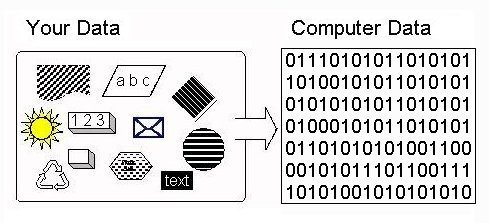
Figure 1: Displays the categorical encoding required for computers to understand the input. The figure comes from this blogpost.

How to convert categorical data to numerical data?
There are many ways to convert categorical values into numerical values. Each approach has its own positive and negative impact on the feature set. Hereby, two main methods will be the focus: One-hot encoding and Label encoding. Both of these encoders are part of the scikit-learn library (one of the most widely used Python libraries) and are used to convert text or categorical data into numerical data which the model expects and and can work with.

The One-Hot Encoding (OHE) concept
The one-hot encoding is a vector representation where all the elements of the vector are set to 0 except one, which has 1 as its value. For example, [0 0 0 1 0 0] is a one-hot vector. Simply put, one-hot encoding, also known as binary encoding, is a binary representation of categorical variables as binary vectors.

The figure shown below helps us gain an overall idea of the one-hot encoding concept.

One Hot encoding
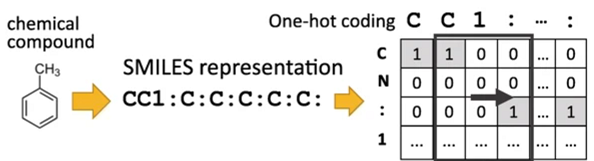
Figure 2 : Displays the one-hot encoding of the toluene molecule. Figure taken from the article BMC Bioinformatics. (2018), 19,526, more information can be found there.

Let us take a deeper look into the concept with the help of a simple example that will describe the basic concept of one-hot encoding, why it is useful and how one can approach it.

Why using one-hot encoding?
One-hot encoding allows the representation of categorical data to be more expressive. It is difficult for many machine learning algorithms to work with categorical data directly that's why the label values which are categorical must be converted into numbers first as a preprocessing step. This is required for both input and output variables that are categorical.

We could also use an integer encoding directly. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature "cold", "warm", and "hot". There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship by using integer encoding might be not useful to solve the problem. An example might be the labels "dog" and "cat".

Example of one-hot encoding
Let us take a look at a very simple example to understand this concept. Assume we have the "color" variable which has three labels red , blue and green. All these labels must be converted into numeric form in order to work with our machine learning algorithm. This can be done by creating three new columns having all three labels and use 1 for the color of the respective label and 0 for the other colors as shown in Figure 4.

One Hot Encoding
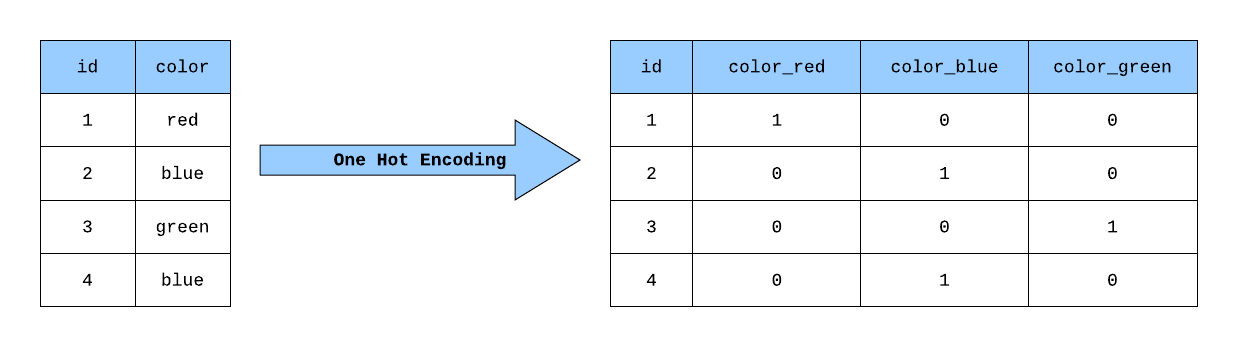
Figure 3 : The visual demonstration of one-hot encoding done on the variable "color". Figure taken from the article: "Building a One Hot Encoding Layer with TensorFlow", George Novack, towardsdatascience, more details can be found there.

Advantages and disadvantages of one-hot encoding
Advantages

If the cardinality (the number of categories) of the categorical features is low (relative to the amount of data), one-hot encoding will work best.
One-hot encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space.
Disadvantages

Increase in dimensionality, after adding several columns based on categorical variables which may result in an increase in the computational cost.
There is a high chance of multi-collinearity due to dummy variables (unique category added as a feature) which can affect the performance of the model.
One-hot encoding can result in increasing the sparsity of a data set (a sparse matrix is a matrix in which most of the elements are zero).
Similar: Integer or label encoding
Label Encoding, or integer encoding, is a popular encoding technique for handling categorical variables and is easily reversible. In this technique, each label is assigned a unique integer based on alphabetical ordering, so that machines can work with it properly. Machine learning algorithms can then decide in a better way on how labels must be operated on. It is an important preprocessing step for structured data sets in supervised learning.

Example of integer encoding

Let us use a similar example as above: We have a color variable and we can assign red as 0, green as 1, and blue as 2 as shown in Figure 5.

OneHotEncoding Example



Figure 5 : The visual demonstration of label encoding done on the variable "color". Figure taken from the article: "Know about Categorical Encoding, even New Ones!", Ahmed Othmen, towardsdatascience, more details can be found there.

Difference between label and one-hot encoding

There is not much difference between these two encoding techniques, it mainly depends on the type of data and model used. For example, if we have categorical features which are not ordinal (dog or cat) then we can use one-hot encoding. Label encoding works best with ordinal data like good=0, better=1, best=2. Also when there are many categorical variables then it might be good to choose label encoding just to avoid high memory consumption and sparsity.

What is padding?
Padding is used to add zeros to the resulted one-hot encoded matrix. There are different types of padding, we chose to performed zero padding in here. For more details, please refer to this Article.

Why is it performed?

Padding is performed to make the dimensions of the matrix equal - or to preserve the height and the width - and to not have to worry too much about tensor dimensions when used as an input for the deep learning models.

How is it performed?

Padding can be performed by using the numpy.pad function which takes several parameters like the array which needs to be padded, pad_width which is number of values added to the edges of each axis and mode which by default is "constant".

In this tutorial, padding is performed

implicitly: when applying one-hot encoding using a python implementation on the preprocessed data, where we have given the maximum length of the string as the parameter so that all the resulting one-hot encoded matrices are of the same dimension
explicitly: More info on this can be found in the supplementary section, where we apply one-hot encoding using keras and scikit-learn implementations.
Further readings
This section lists some resources for further reading:

What is one-hot encoding and when is it used in data science?
Categorical encoding using Label-Encoding and One-Hot-Encoder
Hirohara, M., Saito, Y., Koda, Y. et al. Convolutional neural network based on SMILES representation of compounds for detecting chemical motif. BMC Bioinformatics 19, 526 (2018)
How one can use matplotlib.pyplot.imshow() in Python

In [3]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 50.0 MB/s eta 0:00:00


In [26]:
from pathlib import Path
from warnings import filterwarnings

# Silence some expected warnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

In [27]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [28]:
# Load data
df = pd.read_csv(DATA / "/content/teachopencadd/teachopencadd/talktorials/T021_one_hot_encoding/data/CHEMBL25_activities_EGFR.csv", index_col=0)
df = df.reset_index(drop=True)

In [29]:
# Check the dimension and missing value of the data
print("Shape of dataframe : ", df.shape)
df.info()

Shape of dataframe :  (3905, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         3905 non-null   object 
 1   IC50              3905 non-null   float64
 2   units             3905 non-null   object 
 3   canonical_smiles  3905 non-null   object 
 4   pIC50             3905 non-null   float64
dtypes: float64(2), object(3)
memory usage: 152.7+ KB


In [30]:
# Look at head
df.head()
# NBVAL_CHECK_OUTPUT

,chembl_id,IC50,units,canonical_smiles,pIC50
0,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
3,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
4,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


In [31]:
# Keep necessary columns
chembl_df = df[["canonical_smiles", "pIC50"]]
chembl_df.head()
# NBVAL_CHECK_OUTPUT

,canonical_smiles,pIC50
0,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
3,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
4,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


In [32]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.
    """

    # Convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetCountFingerprint(mol))
    if method == "morgan3":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=n_bits)
        return np.array(fpg.GetCountFingerprint(mol))
    else:
        print(f"Warning: Wrong method specified: {method}." " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [33]:
chembl_df["fingerprints_df"] = chembl_df["canonical_smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe:", chembl_df.shape)
chembl_df.head(3)
# NBVAL_CHECK_OUTPUT

Shape of dataframe: (3905, 3)


,canonical_smiles,pIC50,fingerprints_df
0,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [34]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(
    chembl_df["fingerprints_df"], chembl_df[["pIC50"]], test_size=0.3, random_state=42
)

# Print the shape of training and testing data
print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)
# NBVAL_CHECK_OUTPUT

Shape of training data: (2733,)
Shape of test data: (1172,)


In [35]:
def neural_network_model(hidden1, hidden2):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer3"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

In [36]:
# Neural network parameters
batch_sizes = [16, 32, 64]
nb_epoch = 50
layer1_size = 64
layer2_size = 32

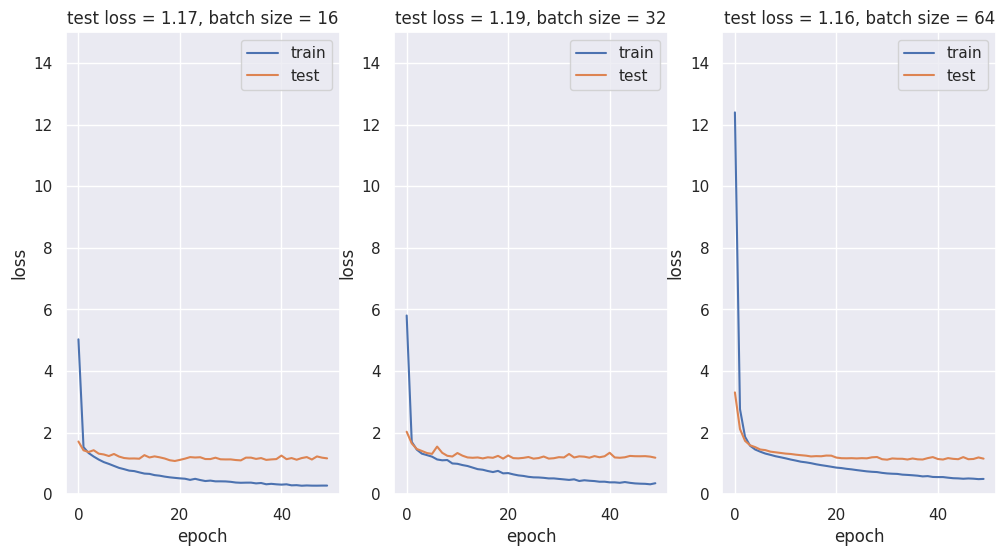

In [37]:
# Plot
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x_train))).astype(float),
        y_train.values,
        batch_size=batch,
        validation_data=(np.array(list((x_test))).astype(float), y_test.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}"
    )
plt.show()

In [38]:
# Save the trained model
filepath = DATA / "/content/teachopencadd/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/best_weights.hdf5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x_train))).astype(float),
    y_train.values,
    epochs=nb_epoch,
    batch_size=16,
    callbacks=callbacks_list,
    verbose=0,
)

In [39]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x_test))), y_test.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 1.22
 mse (same as loss): 1.22
 mae: 0.83


In [40]:
# Predict pIC50 values on x_test data
y_pred = model.predict(np.array(list((x_test))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y_pred[0:5]]

37/37 [==============================] - 0s 2ms/step
9.23
7.52
7.95
7.63
5.56


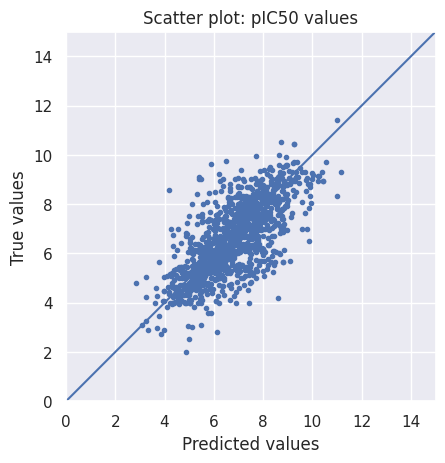

In [41]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.show()

In [44]:
# Load external/unlabeled data set
external_data = pd.read_csv(DATA / "/content/teachopencadd/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/test.csv", index_col=0)
external_data = external_data.reset_index(drop=True)
external_data.head()
# NBVAL_CHECK_OUTPUT

,canonical_smiles
0,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccccc1
1,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1
2,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1
3,O=C(/C=C/CN1CC[NH+](C)CC1)N1Cc2sc3ncnc(N[C@H](...
4,S(=O)(=O)(NC(=O)Cn1c(C)ncc1[N+](=O)[O-])c1ccc(...


In [45]:
# Convert SMILES strings to MACCS fingerprints
external_data["fingerprints_df"] = external_data["canonical_smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe : ", external_data.shape)
external_data.head(3)
# NBVAL_CHECK_OUTPUT

Shape of dataframe :  (60, 2)


,canonical_smiles,fingerprints_df
0,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccccc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [46]:
# Load model
model = load_model(DATA / "/content/teachopencadd/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/ANN_model.hdf5", compile=False)

In [47]:
# Prediction on external/unlabeled data
predictions = model.predict(
    np.array(list((external_data["fingerprints_df"]))).astype(float), callbacks=callbacks_list
)

predicted_pIC50 = pd.DataFrame(predictions, columns=["predicted_pIC50"])
predicted_pIC50_df = external_data.join(predicted_pIC50)

predicted_pIC50_df.head(3)

2/2 [==============================] - 0s 7ms/step


,canonical_smiles,fingerprints_df,predicted_pIC50
0,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccccc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.779419
1,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.483406
2,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.343009


In [48]:
# Save the predicted values in a csv file in the data folder
predicted_pIC50_df.to_csv(DATA / "/content/teachopencadd/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/predicted_pIC50_df.csv")

In [50]:
# Select top 3 drugs
predicted_pIC50_df = pd.read_csv(DATA / "/content/teachopencadd/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/predicted_pIC50_df.csv", index_col=0)
top3_drug = predicted_pIC50_df.nlargest(3, "predicted_pIC50")
top3_drug

,canonical_smiles,fingerprints_df,predicted_pIC50
9,Brc1cc(Nc2ncnc3nc(NC)ccc23)ccc1,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,8.481803
53,c1cc(ccc1Nc2c(c(nc[nH+]2)NCCCn3cc[nH+]c3)N)I,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,8.144416
18,Clc1c(F)ccc(NC=2N=CNC=3C=2C=C(OCCCCC=C=C)C(=O)...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,8.120271


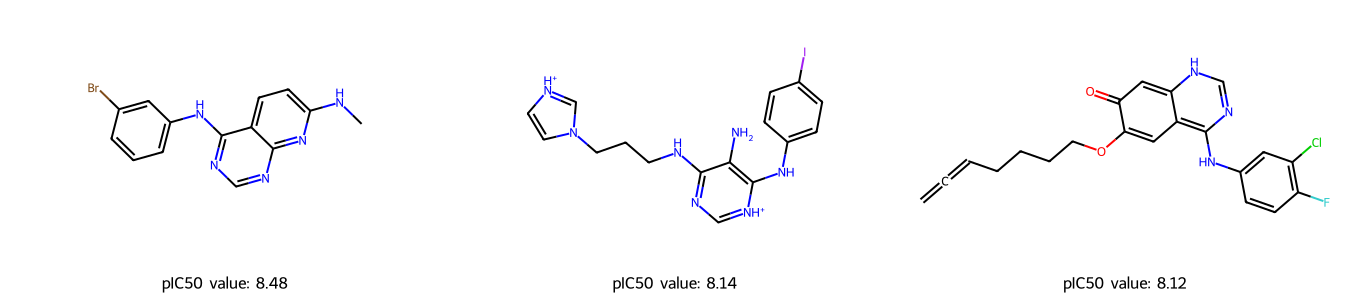

In [51]:
# Draw the drug molecules
highest_pIC50 = predicted_pIC50_df["canonical_smiles"][top3_drug.index]

mols_EGFR = [Chem.MolFromSmiles(smile) for smile in highest_pIC50]
pIC50_EGFR = top3_drug["predicted_pIC50"].tolist()
pIC50_values = [(f"pIC50 value: {value:.2f}") for value in pIC50_EGFR]

Draw.MolsToGridImage(mols_EGFR, molsPerRow=3, subImgSize=(450, 300), legends=pIC50_values)

From above we can see that there are some similarities between the three molecules. For example, they contain an aniline and pyrimidine group, as well as several aromatic carbon rings.

Drug similarity

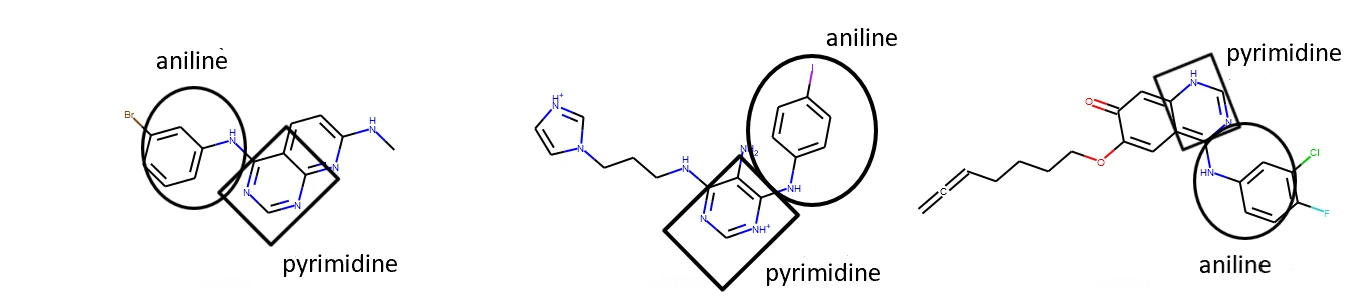

Figure 5: Representing similarities between selected top three drug molecules.

Since the external/unlabeled data is also taken from ChEMBL, we can double check if our predictions make sense. For example, the first compound with SMILES Brc1cc(Nc2ncnc3nc(NC)ccc23)ccc1 and predicted pIC50 value of 8.48, has a high tested affinity against EGFR: a pIC50 value of 7.28, see entry CHEMBL298637.

Using the neural network for predictive modeling has some advantages: it is not as time consuming as laboratory experiments and it is much cheaper. It also hints at the kind of molecules that could be further investigated as potential EGFR inhibitors.

However, this model has some disadvantages: it highly depends on the chemical space of the training data, the parameter tuning as well as variable initialization which might affect the final results. Such a model neither provides information about the side effects of compounds nor their potential toxicity.